In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [47]:
train = pd.read_csv("C:\\Users\\ASUS\\Downloads\\Mini Project 2 - Regression (Bike Sharing Demand)\\train.csv")
test = pd.read_csv("C:\\Users\\ASUS\\Downloads\\Mini Project 2 - Regression (Bike Sharing Demand)\\test.csv")

In [48]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [52]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [54]:
train.drop(['datetime'], axis=1, inplace=True)

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 935.6 KB


In [58]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='holiday', ylabel='count'>

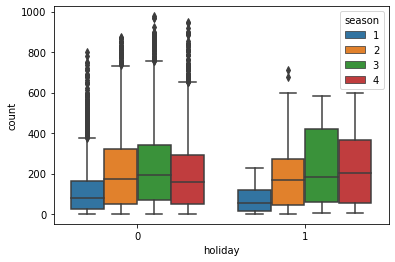

In [59]:
sns.boxplot('holiday', 'count', hue='season', data=train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='count'>

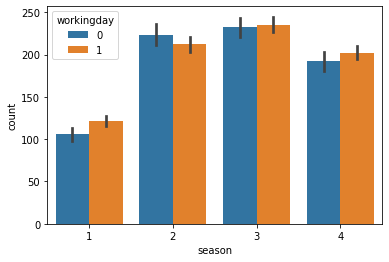

In [60]:
sns.barplot('season', 'count', 'workingday', train)

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [87]:
X = train.drop(['count'], axis=1)
y = train['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
model = LinearRegression()

In [89]:
model.fit(X_train, y_train)

LinearRegression()

In [93]:
print(model.intercept_)

1.7053025658242404e-13


In [95]:
print(model.coef_)

[ 2.01504732e-14  2.08566984e-13 -8.42818012e-14  5.14696895e-14
  2.10791081e-15  5.25352041e-15 -3.77144740e-15  3.09226162e-16
  1.00000000e+00  1.00000000e+00]


In [94]:
y_pred = model.predict(X_test)

In [96]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
3133,127,127.0
5786,13,13.0
5224,163,163.0
8953,233,233.0
8054,222,222.0
...,...,...
1963,351,351.0
5807,2,2.0
10061,509,509.0
5427,5,5.0


In [97]:
df.to_csv('model_output.csv')

In [101]:
test['casual'] = train['casual']
test['registered'] = train['registered']
test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,1,0,1,1,10.66,11.365,56,26.0027,3,13
1,1,0,1,1,10.66,13.635,56,0.0000,8,32
2,1,0,1,1,10.66,13.635,56,0.0000,5,27
3,1,0,1,1,10.66,12.880,56,11.0014,3,10
4,1,0,1,1,10.66,12.880,56,11.0014,0,1
...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,38,137
6489,1,0,1,2,10.66,12.880,60,11.0014,44,165
6490,1,0,1,1,10.66,12.880,60,11.0014,34,254
6491,1,0,1,1,10.66,13.635,56,8.9981,58,554


In [100]:
y_pred_test = model.predict(test)

In [102]:
test['count'] = y_pred_test

In [103]:
test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,1,1,10.66,11.365,56,26.0027,3,13,16.0
1,1,0,1,1,10.66,13.635,56,0.0000,8,32,40.0
2,1,0,1,1,10.66,13.635,56,0.0000,5,27,32.0
3,1,0,1,1,10.66,12.880,56,11.0014,3,10,13.0
4,1,0,1,1,10.66,12.880,56,11.0014,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,38,137,175.0
6489,1,0,1,2,10.66,12.880,60,11.0014,44,165,209.0
6490,1,0,1,1,10.66,12.880,60,11.0014,34,254,288.0
6491,1,0,1,1,10.66,13.635,56,8.9981,58,554,612.0


In [104]:
test.to_csv("test_model_output.csv")